In [2]:
import pandas as pd

# Load the CSV files
population_df = pd.read_csv('population.csv')
projections_df = pd.read_csv('projections.csv')

# Strip leading and trailing spaces from the column names
population_df.columns = population_df.columns.str.strip()
projections_df.columns = projections_df.columns.str.strip()

# Filter the population data to include only countries that are in projections
filtered_population_df = population_df[population_df['Region'].isin(projections_df['Country'])]

# Find countries that are in projections but not in population
missing_countries = set(projections_df['Country']) - set(population_df['Region'])

# Save the filtered data to a new CSV file
filtered_population_df.to_csv('filtered_population.csv', index=False)

# Save the list of missing countries to a new file
with open('missing_countries.txt', 'w') as f:
    for country in missing_countries:
        f.write(f"{country}\n")

print("Filtered data saved to 'filtered_population.csv'")
print("List of missing countries saved to 'missing_countries.txt'")


Filtered data saved to 'filtered_population.csv'
List of missing countries saved to 'missing_countries.txt'


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Load the filtered population data
population_df = pd.read_csv('filtered_population.csv')

# Strip any leading/trailing spaces from column names
population_df.columns = population_df.columns.str.strip()

# Function to generate normal distribution and save PDF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def create_normal_distribution_pdfs(df):
    # Iterate over each country
    distributions = {}
    for country, country_data in df.groupby('Region'):
        country_distributions = {}
        # For each country, group the data by year
        pop = country_data['Population'].str.replace(' ', '').astype(float)
        std_population = pop.std()
        for year, data in country_data.groupby('Year'):
            # Get the population data for the specific year
            populations = data['Population'].str.replace(' ', '').astype(float)  # Remove spaces and convert to float
            
            # Calculate mean and standard deviation for the population of that country in that year
            mean_population = populations
            sigma = np.sqrt(np.log(1 + (std_population/mean_population)**2))
            mu = np.log(mean_population) - sigma**2 / 2
            country_distributions[year] = [sigma, mu, mean_population, std_population]
        distributions[country] = country_distributions        
    return distributions

# Generate normal distribution PDFs for each country
distributions = create_normal_distribution_pdfs(population_df)
print(distributions["Afghanistan"][1951])

[1    1.84032
Name: Population, dtype: float64, 1    7.271817
Name: Population, dtype: float64, 1    7826.0
Name: Population, dtype: float64, 41831.08817327449]


301    6.957923
Name: Population, dtype: float64 301    0.502601
Name: Population, dtype: float64 301    1193.0
Name: Population, dtype: float64 639.5389193127133


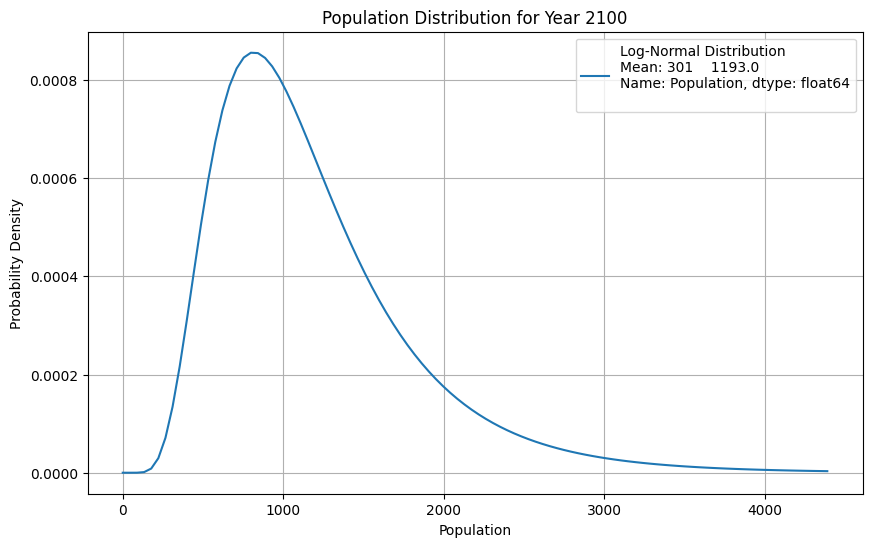

In [4]:
Country = "Albania"
Year = 2100
sigma = distributions[Country][Year][0]
mu = distributions[Country][Year][1]
mean_population = distributions[Country][Year][2]
std_population = distributions[Country][Year][3]
print(mu, sigma, mean_population, std_population)
# Create an array of population values around the mean
x = np.linspace(0, mean_population + 5*std_population, 100)
# Generate the normal distribution
y = lognorm.pdf(x, s=sigma, scale=np.exp(mu))

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y,label=f'Log-Normal Distribution\nMean: {mean_population}\n')
plt.title(f'Population Distribution for Year {Year}')
plt.xlabel('Population') 
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Create a cleaner version of the dictionary
cleaned_distributions = {}

for country, year_data in distributions.items():
    cleaned_distributions[country] = {}
    for year, data_list in year_data.items():
        # Extract scalar values from pandas Series, if present
        cleaned_data = [d.values[0] if isinstance(d, pd.Series) else d for d in data_list]
        cleaned_distributions[country][year] = cleaned_data


In [39]:
import csv

# Save the dictionary to a CSV file
with open('pop_dist.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    header = ['Country', 'Year', 'location', 'scale', 'mean', 'std']
    writer.writerow(header)
    for key, value in cleaned_distributions.items():
        for kley,val in value.items():
            writer.writerow([key,kley,val[0],val[1],val[2],val[3]])

